In this assignment, I use machine learning to model the MNIST data. I  evaluate a linear model and SVC model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import cv2

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score


from sklearn.neighbors import KNeighborsClassifier

import joblib


# Downloading MNIST data 

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
print(mnist.DESCR)

C:\Users\lidii\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [4]:
X=mnist["data"]
y=mnist["target"].astype(np.uint8)

# Division of data into training, validation and test  and and standardizing them

In [5]:

X_train = X[:50000]
y_train = y[:50000]

X_val = X[51000:52000]
y_val = y[51000:52000]

X_test = X[53000:54000]
y_test = y[53000:54000]


In [6]:
# Standardizing the data (generally always should do when using SVM models).
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) #fit and transform
X_val_scaled = scaler.transform(X_val)  # only transforming  
X_test_scaled = scaler.transform(X_test) # only transforming  

In [7]:
# Chack a label
y[0]

5

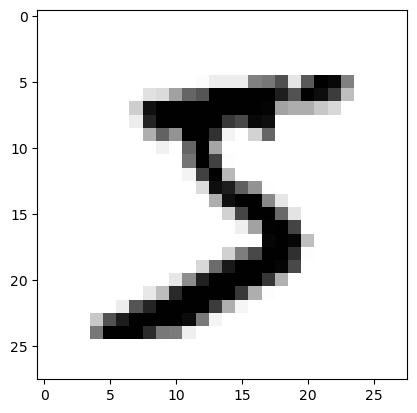

In [8]:
#Chack the image for the label
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)

In [9]:
print(X_train.shape)
print(y_train.shape)

(50000, 784)
(50000,)


# K-nearest neighbors (KNN)-model

In [10]:
model = KNeighborsClassifier(3)

In [11]:
#Trening of  KNN model, hyperparameter selection

model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
#Validation KNN-model
y_val_pred_knn = model.predict(X_val_scaled)

In [13]:
#Checking the accuracy of the prediction of KNN-model
accuracy_knn_val = accuracy_score(y_val, y_val_pred_knn)
print("Accuracy of KNN on validation data:",accuracy_knn_val)

Accuracy of KNN on validation data: 0.957


In [14]:
#Saving the model
joblib.dump(model, 'model_knn.joblib')

['model_knn.joblib']

In [15]:
# Ladda modell
loaded_model = joblib.load('model_knn.joblib')

In [16]:
# Gör förutsägelser
predicted_test = loaded_model.predict(X_test_scaled)


In [17]:
#Compute accuracy score for KNN model (test data)
accuracy_test_knn = accuracy_score(y_test, predicted_test)
print("Accuracy Score on Test Data:", accuracy_test_knn)

Accuracy Score on Test Data: 0.943


# My images

Checking models in photographs that I took myself:


In [18]:
#Image pre-processing

def preprocess_image(image_path):    
    
    # Load the image
    image = cv2.imread(image_path)
    
    # Convert to grayscale
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Transform the image to 28x28 pixels
    resized_image = cv2.resize(grayscale_image, (28, 28), interpolation=cv2.INTER_AREA)
    
  
    
 # Change the color of the pixels
    lower_pixel = 140  # Do not change black pixels to white
    upper_pixel = 160  # Change white pixels to black
    
    for i in range(resized_image.shape[0]):
        for j in range(resized_image.shape[1]):
            if resized_image[i, j] <= lower_pixel:
                resized_image[i, j] = 0
            elif resized_image[i, j] > upper_pixel:
                resized_image[i, j] = 255
                
    normalized_image = resized_image
    resized_image = cv2.bitwise_not( resized_image) #invert the pixel values

     
    
    # Flattens the image into a vector with 784 features
    flattened_image = resized_image.flatten().reshape(1, -1)
    
   
    
    return resized_image, normalized_image, flattened_image




In [19]:
#Getting an image from a folder
image_path = r"0.jpg"

In [20]:
#Image pre-processing
resized_image, normalized_image, flattened_image = preprocess_image(image_path)

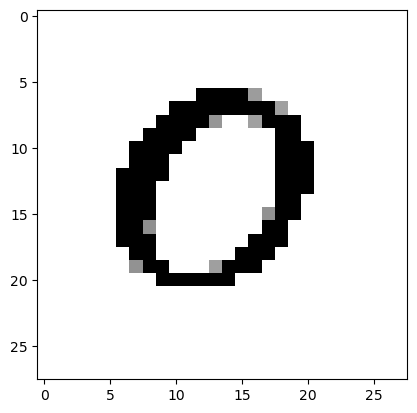

In [21]:
# Image after changing the color of the pixels
plt.imshow(normalized_image, cmap='gray')


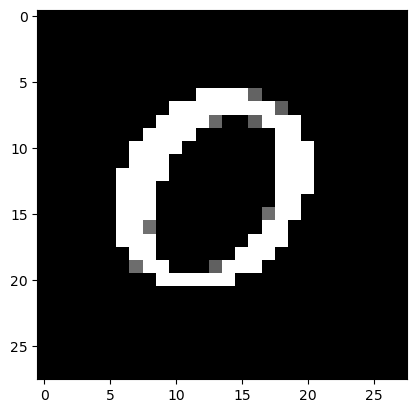

In [22]:
# Image after invert the pixel values
plt.imshow(resized_image, cmap='gray')

In [23]:
# Prediction av KNN-model on the preprocessed image

my_image_predict = loaded_model.predict(flattened_image)
print("Prediction knn:", my_image_predict)

Prediction knn: [0]
